In [3]:
 !cd .. && mkdir build
 !cd ../build/ && rm -rf *
 !cd ../build && cmake \
   -DPYTHON_EXECUTABLE="$(which python3)" \
  -DCMAKE_BUILD_TYPE=Release ..
 !cd ../build && make install

mkdir: no se puede crear el directorio «build»: El archivo ya existe
-- The C compiler identification is GNU 9.3.0
-- The CXX compiler identification is GNU 9.3.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /usr/local/bin/python3 (found version "3.7.3") 
-- Found PythonLibs: /usr/local/lib/libpython3.7m.a
-- pybind11 v2.2.4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/home/hernan/Escritorio/metnum/tp3
-- Configuring done
-- Generating done
-- Bui

In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt

# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python3 --version
import metnum

/home/hernan/Escritorio/metnum/tp3/notebooks
Python 3.7.3


In [5]:
df = pd.read_csv('../data/train.csv')
df = df[df['provincia']=='Merida'].dropna(subset = ['habitaciones','metroscubiertos', 'banos','garages', 'antiguedad'])

X = df['habitaciones'].values
y = df['precio'].values

X = X.reshape(len(X),1)
y = y.reshape(len(y),1)
# df.info()
linear_regressor = metnum.LinearRegression()

linear_regressor.fit(X,y)


In [43]:
df = pd.read_csv('../data/train.csv')
df = df.dropna(subset = ['habitaciones','metroscubiertos', 'banos'])

X2 = df[['habitaciones','metroscubiertos','banos']].values
X = df['habitaciones'].values
y = df['precio'].values
from sklearn.feature_selection import f_regression
F, pval = f_regression(X2, y)
pval

array([0., 0., 0.])

In [208]:
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import  SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

def errorRMSE(y1,y2 ):
    return sqrt ( mean_squared_error(y1,y2) )

df = pd.read_csv('../data/train.csv')
#df = df[df['provincia'] == 'Distrito Federal']

# Segmentación por precio!
df1h = df[df["habitaciones"]==1]
df2h = df[df["habitaciones"]==2]
df3h = df[df["habitaciones"]==3]
# df1 = df[df["precio"]<952000]

# df2 = df[df["precio"]>=952000]
# df2 = df2[df2["precio"]<1850000]

# df3 = df[df["precio"]>=1850000]
# df3 = df3[df3["precio"]<3390000]

#df4 = df[df["precio"]<1750000]
#df = df3h

df['metrosdescubiertos'] = df['metrostotales']-df['metroscubiertos']
df = df[df['metrosdescubiertos']>=0]

#df['fecha'] = df['fecha'].apply(lambda x: int( x.split('-')[0]) + int(x.split('-')[1] )/13.0 )
df = pd.concat([df,pd.get_dummies(df['provincia'], prefix='provincia_')],axis=1)
#df['tipodepropiedad'] = df['tipodepropiedad'] * 10
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100838 entries, 0 to 239997
Data columns (total 56 columns):
id                                  100838 non-null int64
titulo                              99180 non-null object
descripcion                         100331 non-null object
tipodepropiedad                     100825 non-null object
direccion                           81229 non-null object
ciudad                              100744 non-null object
provincia                           100806 non-null object
antiguedad                          84586 non-null float64
habitaciones                        95069 non-null float64
garages                             88466 non-null float64
banos                               95043 non-null float64
metroscubiertos                     100838 non-null float64
metrostotales                       100838 non-null float64
idzona                              91191 non-null float64
lat                                 48392 non-null float64
lng  

In [210]:
df = df[df['tipodepropiedad']=='Apartamento']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27448 entries, 0 to 239997
Data columns (total 56 columns):
id                                  27448 non-null int64
titulo                              27348 non-null object
descripcion                         27407 non-null object
tipodepropiedad                     27448 non-null object
direccion                           23954 non-null object
ciudad                              27436 non-null object
provincia                           27440 non-null object
antiguedad                          23730 non-null float64
habitaciones                        27066 non-null float64
garages                             25801 non-null float64
banos                               27010 non-null float64
metroscubiertos                     27448 non-null float64
metrostotales                       27448 non-null float64
idzona                              26479 non-null float64
lat                                 14426 non-null float64
lng          

In [211]:
df = df.loc[:, df.columns != 'titulo']
df = df.loc[:, df.columns != 'descripcion']
df = df.loc[:, df.columns != 'direccion']
df = df.loc[:, df.columns != 'provincia']
df = df.loc[:, df.columns != 'ciudad']
df = df.loc[:, df.columns != 'id']
df = df.loc[:, df.columns != 'fecha']
df = df.loc[:, df.columns != 'lat']
df = df.loc[:, df.columns != 'lng']
df = df.loc[:, df.columns != 'idzona']
df = df.loc[:, df.columns != 'tipodepropiedad']
df = df.loc[:, df.columns != 'antiguedad']
df = df.loc[:, df.columns != 'banos']
df = df.loc[:, df.columns != 'garages']
df = df.loc[:, df.columns != 'usosmultiples']
df = df.loc[:, df.columns != 'gimnasio']
df = df.loc[:, df.columns != 'piscina']
df = df.loc[:, df.columns != 'escuelascercanas']
df = df.loc[:, df.columns != 'centroscomercialescercanos']

df = df.dropna(subset = ['habitaciones','metroscubiertos','metrostotales','precio'])
df = df[df['habitaciones']>0]
df['metrosporhabitacion'] = df['metroscubiertos']/df['habitaciones']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27066 entries, 0 to 239997
Data columns (total 38 columns):
habitaciones                        27066 non-null float64
metroscubiertos                     27066 non-null float64
metrostotales                       27066 non-null float64
precio                              27066 non-null float64
metrosdescubiertos                  27066 non-null float64
provincia__Aguascalientes           27066 non-null uint8
provincia__Baja California Norte    27066 non-null uint8
provincia__Baja California Sur      27066 non-null uint8
provincia__Campeche                 27066 non-null uint8
provincia__Chiapas                  27066 non-null uint8
provincia__Chihuahua                27066 non-null uint8
provincia__Coahuila                 27066 non-null uint8
provincia__Colima                   27066 non-null uint8
provincia__Distrito Federal         27066 non-null uint8
provincia__Durango                  27066 non-null uint8
provincia__Edo. de México

In [207]:
def add_one(x):
	return x + 1

#df['habitaciones'] = df['habitaciones'].apply(lambda x: x**3)
#df['escuelascercanas'] = df['escuelascercanas'].apply(lambda x: x*10)
#df['banos'] = df['banos'].apply(lambda x: x**3)
#df['precio'] = df['precio'].apply(lambda x: sqrt(x))
#df['lujo'] = np.where((df['metrosdescubiertos']>10) & (df['piscina'] > 0), (df['metrosdescubiertos'])**2, 0)
#df = df.loc[:, df.columns != 'metroscubiertos']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10575 entries, 17 to 239986
Data columns (total 38 columns):
habitaciones                        10575 non-null float64
metroscubiertos                     10575 non-null float64
metrostotales                       10575 non-null float64
precio                              10575 non-null float64
metrosdescubiertos                  10575 non-null float64
provincia__Aguascalientes           10575 non-null uint8
provincia__Baja California Norte    10575 non-null uint8
provincia__Baja California Sur      10575 non-null uint8
provincia__Campeche                 10575 non-null uint8
provincia__Chiapas                  10575 non-null uint8
provincia__Chihuahua                10575 non-null uint8
provincia__Coahuila                 10575 non-null uint8
provincia__Colima                   10575 non-null uint8
provincia__Distrito Federal         10575 non-null uint8
provincia__Durango                  10575 non-null uint8
provincia__Edo. de Méxic

In [212]:
### df.drop(['titulo', 'descripcion', 'ciudad', 'provincia', 'direccion'],axis=1,inplace=True)
dfsp = df
dfsp = dfsp.loc[:, df.columns != 'precio']

X = dfsp.values


y = df['precio'].values

X = X.reshape(len(X), 37)
y = y.reshape(len(y),)

linear_regressor = metnum.LinearRegression()

linear_regressor.fit(X,y)
y_pred = linear_regressor.predict(X)
#linear_regressor.coef()
errorRMSE(y,y_pred)



1348459.234329893

In [101]:
dfsp

,garages,banos,metroscubiertos,metrostotales,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,metrosdescubiertos,lujo
2,2.0,2.0,144.0,166.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0
6,1.0,2.0,140.0,160.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0
15,2.0,4.0,180.0,250.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0
16,2.0,3.0,210.0,275.0,0.0,0.0,0.0,1.0,1.0,65.0,0.0
19,2.0,2.0,133.0,184.0,0.0,0.0,0.0,0.0,0.0,51.0,0.0
31,2.0,2.0,143.0,196.0,0.0,1.0,0.0,1.0,1.0,53.0,0.0
32,2.0,4.0,292.0,355.0,0.0,0.0,0.0,0.0,0.0,63.0,0.0
38,2.0,3.0,144.0,200.0,0.0,0.0,0.0,0.0,0.0,56.0,0.0
44,1.0,2.0,90.0,110.0,0.0,0.0,0.0,1.0,1.0,20.0,0.0
47,2.0,2.0,133.0,140.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0


In [86]:
y**2

array([2450000., 1850000., 2600000., ..., 2079000., 1940000., 2890000.])

In [19]:
from sklearn.metrics import  make_scorer
import datetime

errorRMSE_scorer = make_scorer(errorRMSE, greater_is_better=False)

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

particiones = KFold(n_splits=10, random_state=30, shuffle=True)
linear_regressorCV = metnum.LinearRegression()
anova_filter = SelectKBest(f_regression)
#linear_regressorCV = LinearRegression( )

parameters= dict(features__k=np.arange(1,10))

pipeLR = Pipeline([
            ('features', anova_filter),

            ('clf', linear_regressorCV) ] ) 


GridclfLR = GridSearchCV(pipeLR, parameters, cv = particiones, n_jobs=-1  , scoring = errorRMSE_scorer   )
GridclfLR.fit(X,y)

print("Con Regresion Lineal:")
print( GridclfLR.best_score_ ) 
print( GridclfLR.best_params_ ) 

TypeError: can't pickle metnum.LinearRegression objects

In [141]:
np.arange(5,7)

array([5, 6])

In [81]:
#from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
anova_filter = SelectKBest(f_regression,k='all')
#lr = LinearRegression()
lr = metnum.LinearRegression()
anova_svm = make_pipeline(anova_filter, lr)
anova_svm.fit(X_train, y_train)
y_pred = anova_svm.predict(X_test)

errorRMSE(y_test,y_pred)

644724.8393729732

In [83]:
anova_filter.pvalues_

array([2.93878589e-005, 1.01681180e-032, 6.54263744e-077, 1.32893994e-132,
       2.01283295e-055, 6.57332828e-012, 1.25302817e-006, 1.32532949e-005,
       2.42877774e-002, 6.45432701e-003, 7.75375201e-005, 7.18760513e-002])

In [40]:
df = pd.read_csv('../data/train.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

In [14]:
df.cov()

,precio,habitaciones,metroscubiertos,banos,garages,antiguedad
precio,2.013261e+12,740108.758676,8.692344e+07,624121.167356,281811.167724,1.384865e+06
habitaciones,7.401088e+05,1.424830,4.606922e+01,0.431153,0.084642,9.306470e-01
metroscubiertos,8.692344e+07,46.069224,7.552386e+03,46.445117,16.213116,1.655808e+01
banos,6.241212e+05,0.431153,4.644512e+01,0.732537,0.179813,-4.786961e-01
garages,2.818112e+05,0.084642,1.621312e+01,0.179813,0.659490,-1.500350e-01
antiguedad,1.384865e+06,0.930647,1.655808e+01,-0.478696,-0.150035,3.726498e+01


In [ ]:
df = pd.read_csv('../data/train.csv')

plt.figure(figsize=(12,10))
df = df.dropna()
#df = df[df['precio']<=2200000]
df = pd.concat([df,pd.get_dummies(df['ciudad'], prefix='ciudad')],axis=1)
df.drop(['ciudad'],axis=1,inplace=True)


cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


In [42]:
from scipy.stats import ttest_1samp
df = df.dropna(subset = ['lng','precio','habitaciones','metroscubiertos', 'banos','garages', 'antiguedad'])

_, pvalue = ttest_1samp(df.precio,10)
pvalue

9.845039865207378e-44

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438 entries, 2084 to 239798
Data columns (total 6 columns):
precio             438 non-null float64
habitaciones       438 non-null float64
metroscubiertos    438 non-null float64
banos              438 non-null float64
garages            438 non-null float64
antiguedad         438 non-null float64
dtypes: float64(6)
memory usage: 24.0 KB


In [4]:
X.shape

(41602, 1)

In [5]:
from sklearn.linear_model import LinearRegression

"""
Reemplazar por nuestra implementación 
"""

# linear_regressor = LinearRegression()
linear_regressor = metnum.LinearRegression()

linear_regressor.fit(X,y)



In [5]:
df['prediction'] = linear_regressor.predict(X)

Exception: Data must be 1-dimensional

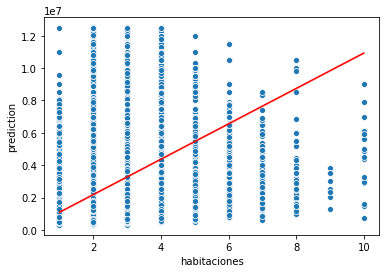

In [7]:
sns.scatterplot(data=df, x='habitaciones', y='precio')
sns.lineplot(data=df, x='habitaciones', y='prediction', color='red')

In [8]:
X2 = df[['habitaciones','metroscubiertos']].values
X2 = X2.reshape(len(X),2)
y = y.reshape(len(y),1)


linear_regressor = metnum.LinearRegression()

linear_regressor.fit(X2,y)
df['prediction'] = linear_regressor.predict(X2)

X2.shape


(41602, 2)

In [ ]:
from math import sqrt
from sklearn.metrics import  make_scorer
import datetime

def errorRMSE(y1,y2 ):
    return sqrt ( mean_squared_error(y1,y2) )

errorRMSE_scorer = make_scorer(errorRMSE)

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor

df = pd.read_csv('../data/train.csv')
df = df[df['provincia']=='Distrito Federal'].dropna(subset = ['fecha','habitaciones','metroscubiertos', 'banos','garages', 'antiguedad'])
df['fecha'] = df['fecha'].apply(lambda x: int( x.split('-')[0]) + int(x.split('-')[1] )/13.0 )

X5 = df[['fecha', 'habitaciones','metroscubiertos', 'banos','garages', 'antiguedad' ]].values


X5 = X5.reshape(len(X),6)
y = y.reshape(len(y) ,)

print(X5)

particiones = KFold(n_splits=10, random_state=30, shuffle=True)
# linear_regressorCV = metnum.LinearRegression()

linear_regressorCV = LinearRegression( )
knnRegresor = KNeighborsRegressor( )

parametersKNN = dict( clf__n_neighbors= [1,2,3,5,7,10,15] ,  clf__weights =['distance', 'uniform'])
parameters= dict()

pipeKnn = Pipeline([
            ('scale', StandardScaler()),

            ('clf', knnRegresor) ] ) 

pipeLR = Pipeline([
            ('scale', StandardScaler()),

            ('clf', linear_regressorCV) ] ) 

GridclfKNN = GridSearchCV(pipeKnn, parametersKNN, cv = particiones, n_jobs=-1, scoring = errorRMSE_scorer)
GridclfKNN.fit(X5,y)

GridclfLR = GridSearchCV(pipeLR, parameters, cv = particiones, n_jobs=-1  , scoring = errorRMSE_scorer   )
GridclfLR.fit(X5,y)

pipeN = Pipeline([
            ('scale', StandardScaler()),

                ('clf', MLPRegressor(  solver = 'adam', max_iter = 5000, learning_rate_init = 0.1))])
grid_params= dict( clf__hidden_layer_sizes=[(1,),(50,),(100,)  , (20, 20, 20), (20,20), (20, 40,40,20)], clf__activation = [  'relu'] , clf__random_state=[0,1,2,3,4,5,6,7,8,9] )
clfMLP = GridSearchCV(pipeN, grid_params, cv = particiones,   n_jobs = -1 ,  scoring = errorRMSE_scorer    )
clfMLP.fit(X5, y)

print("Con Regresion Lineal:")
print( GridclfLR.best_score_ ) 
print("Con Regresion KNN:")
print( GridclfKNN.best_score_ ) 
print(GridclfKNN.best_params_)
print("Con Regresion Red Neuronal:")
print( clfMLP.best_score_ ) 
print(clfMLP.best_params_)

[[2.01346154e+03 3.00000000e+00 2.68000000e+02 2.00000000e+00
  2.00000000e+00 1.00000000e+01]
 [2.01423077e+03 2.00000000e+00 7.50000000e+01 1.00000000e+00
  1.00000000e+00 5.00000000e+00]
 [2.01230769e+03 3.00000000e+00 2.58000000e+02 3.00000000e+00
  2.00000000e+00 2.00000000e+00]
 ...
 [2.01523077e+03 2.00000000e+00 1.38000000e+02 2.00000000e+00
  1.00000000e+00 2.00000000e+01]
 [2.01492308e+03 4.00000000e+00 2.35000000e+02 4.00000000e+00
  0.00000000e+00 2.00000000e+01]
 [2.01546154e+03 3.00000000e+00 1.49000000e+02 2.00000000e+00
  2.00000000e+00 1.00000000e+00]]
